# 1 - Practice activity: Setup a local data cleaning and preprocessing tool
Introduction
Data cleaning and preprocessing are essential steps in preparing your data for analysis and machine learning. Setting up a local environment for these tasks allows you to automate and streamline your workflow. In this reading, we’ll guide you through the process of setting up a local data cleaning and preprocessing tool using Python. This setup will involve installing necessary libraries, creating a reusable script, and automating common data preprocessing tasks.

By the end of this hands-on activity, you will be able to: 

Set up a local environment for data cleaning and preprocessing.

Load and clean datasets by handling missing values and outliers.

Normalize and encode data for machine learning applications.

Automate data preprocessing tasks using reusable Python functions.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('timeseries_delfos-strings-tb3.csv')

In [3]:
df.head()

,device_id,device_name,sample_time,variable,value
0,2580,TB3 - QGFV C - INV01 - ENT07,2025-02-12 05:20:00,DC Current,0.000000
1,2580,TB3 - QGFV C - INV01 - ENT07,2025-02-12 05:25:00,DC Current,0.000000
2,2580,TB3 - QGFV C - INV01 - ENT07,2025-02-12 05:30:00,DC Current,0.072053
3,2580,TB3 - QGFV C - INV01 - ENT07,2025-02-12 05:35:00,DC Current,0.000000
4,2580,TB3 - QGFV C - INV01 - ENT07,2025-02-12 05:40:00,DC Current,0.000000


In [4]:
df['sample_time'] = pd.to_datetime(df['sample_time'])
df_time_filtered = df.set_index('sample_time').between_time('05:20', '18:15')
df_time_filtered.head()

,device_id,device_name,variable,value
sample_time,,,,
2025-02-12 05:20:00,2580,TB3 - QGFV C - INV01 - ENT07,DC Current,0.000000
2025-02-12 05:25:00,2580,TB3 - QGFV C - INV01 - ENT07,DC Current,0.000000
2025-02-12 05:30:00,2580,TB3 - QGFV C - INV01 - ENT07,DC Current,0.072053
2025-02-12 05:35:00,2580,TB3 - QGFV C - INV01 - ENT07,DC Current,0.000000
2025-02-12 05:40:00,2580,TB3 - QGFV C - INV01 - ENT07,DC Current,0.000000


In [6]:
# Filter df_time_filtered to include only 'DC Current' and 'DC Power'
df_cc_power = df_time_filtered[df_time_filtered['variable'].isin(['DC Current', 'DC Power'])]

In [7]:
# Filter df_time_filtered to include only 'DC Voltage'

df_dc_voltage = df_time_filtered[df_time_filtered['variable'].isin(['DC Voltage'])]

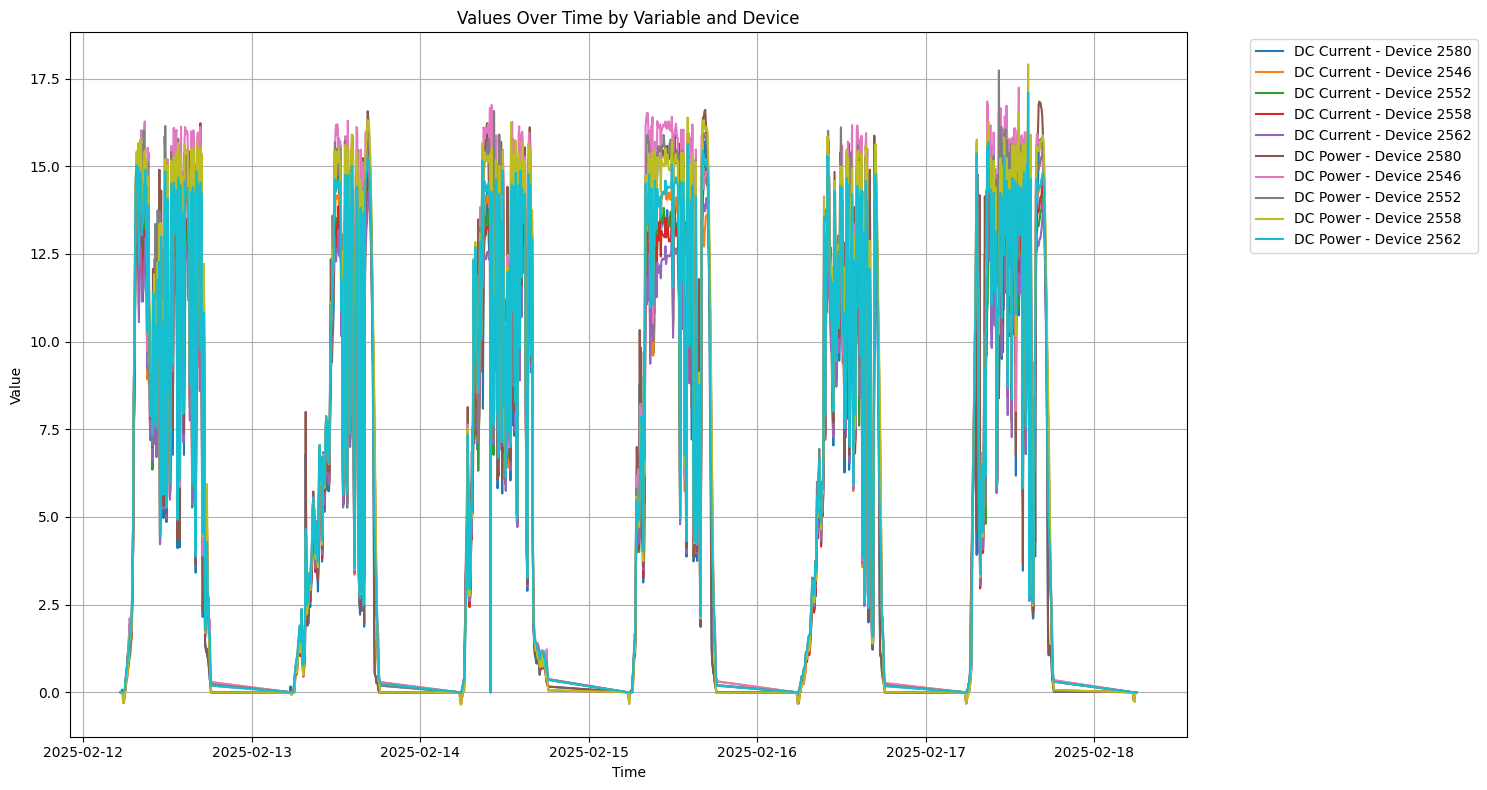

In [8]:
import matplotlib.pyplot as plt

# Create figure with larger size
plt.figure(figsize=(15,8))

# Get unique variables
variables = df_cc_power['variable'].unique()

# Plot each variable separately
for var in variables:
    # Get data for this variable
    var_data = df_time_filtered[df_time_filtered['variable'] == var]
    
    # Plot for each device_id
    for device in var_data['device_id'].unique():
        device_data = var_data[var_data['device_id'] == device]
        plt.plot(device_data.index, device_data['value'], 
                label=f'{var} - Device {device}')

plt.title('Values Over Time by Variable and Device')
plt.xlabel('Time')
plt.ylabel('Value') 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Create a function to detect outliers
def detect_outliers(data):
    # Calculate the mean and standard deviation
    mean, std = data.mean(), data.std()
    
    # Calculate the z-scores
    z_score = (data - mean) / std
    
    # Identify outliers
    outliers = z_score.abs() > 3

    return outliers

In [11]:
# Create a code to performn data cleaning and transformation, showing outliers and missing values

# Function to analyze numerical columns
def analyze_numerical_columns(df):
    # Select only numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    # Initialize results dictionary
    analysis_results = {}
    
    for col in numerical_cols:
        # Calculate missing values
        missing_count = df[col].isnull().sum()
        missing_percentage = (missing_count / len(df)) * 100
        
        # Calculate outliers
        outliers = detect_outliers(df[col].dropna())
        outliers_count = outliers.sum()
        outliers_percentage = (outliers_count / len(df[col].dropna())) * 100
        
        # Store results
        analysis_results[col] = {
            'missing_count': missing_count,
            'missing_percentage': missing_percentage,
            'outliers_count': outliers_count,
            'outliers_percentage': outliers_percentage
        }
    
    # Print results
    print("\nData Analysis Results:")
    print("-" * 50)
    for col, results in analysis_results.items():
        print(f"\nColumn: {col}")
        print(f"Missing values: {results['missing_count']} ({results['missing_percentage']:.2f}%)")
        print(f"Outliers: {results['outliers_count']} ({results['outliers_percentage']:.2f}%)")

# Analyze the data
analyze_numerical_columns(df_cc_power)



Data Analysis Results:
--------------------------------------------------

Column: device_id
Missing values: 0 (0.00%)
Outliers: 0 (0.00%)

Column: value
Missing values: 1470 (13.46%)
Outliers: 0 (0.00%)


In [17]:
# Deixando apenas as colunas e valores de interesse

df_dc = df[['variable', 'value']]

df_dc = df_dc[df_dc['variable'] == 'DC Current'][['value']]

df_dc = df_dc[df_dc['value'] != 0]

df_dc.head()

,value
2,0.072053
8,0.158927
9,0.333827
10,0.510000
11,0.843858


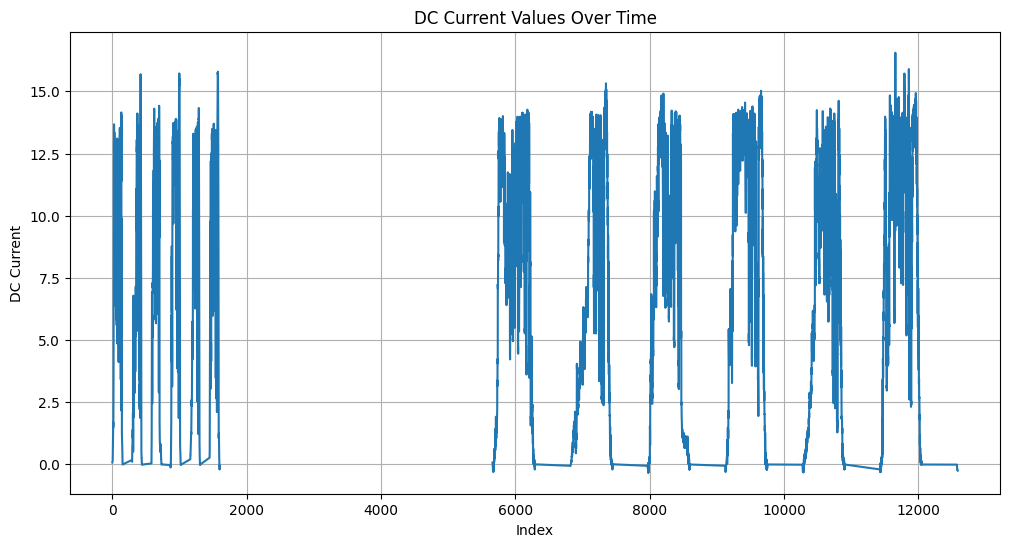

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_dc['value'].plot()
plt.title('DC Current Values Over Time')
plt.ylabel('DC Current')
plt.xlabel('Index')
plt.grid(True)
plt.show()

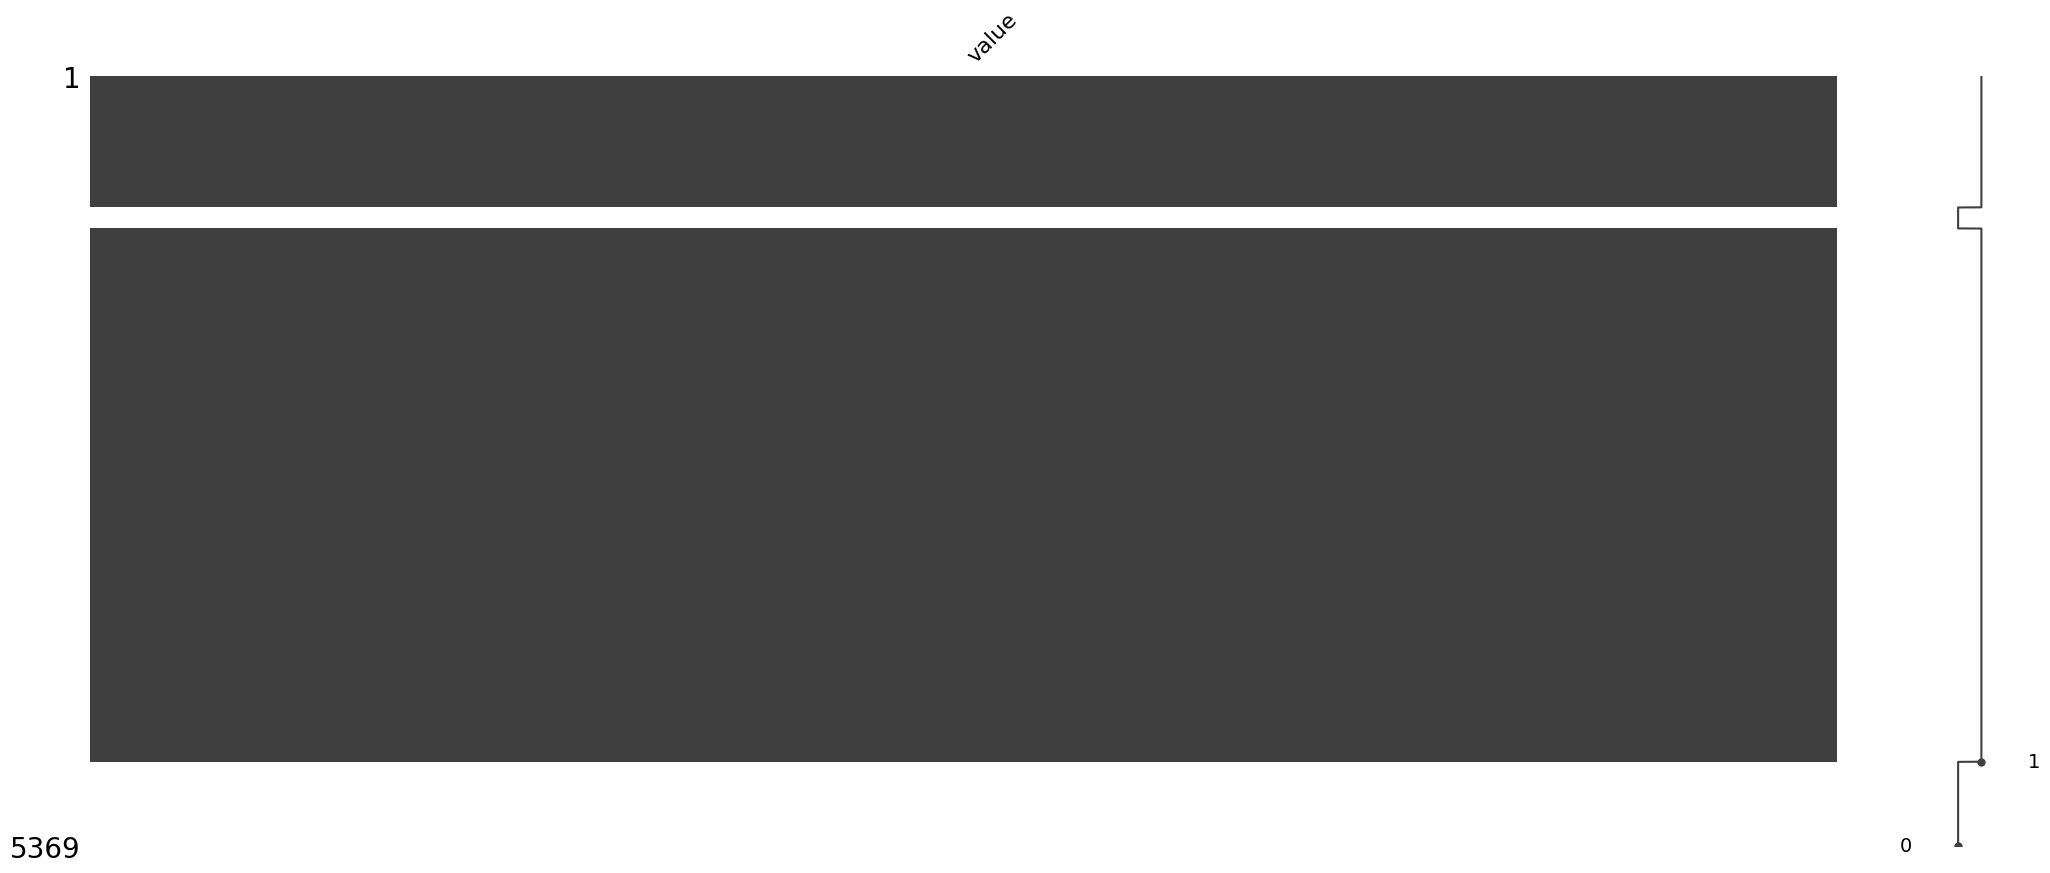

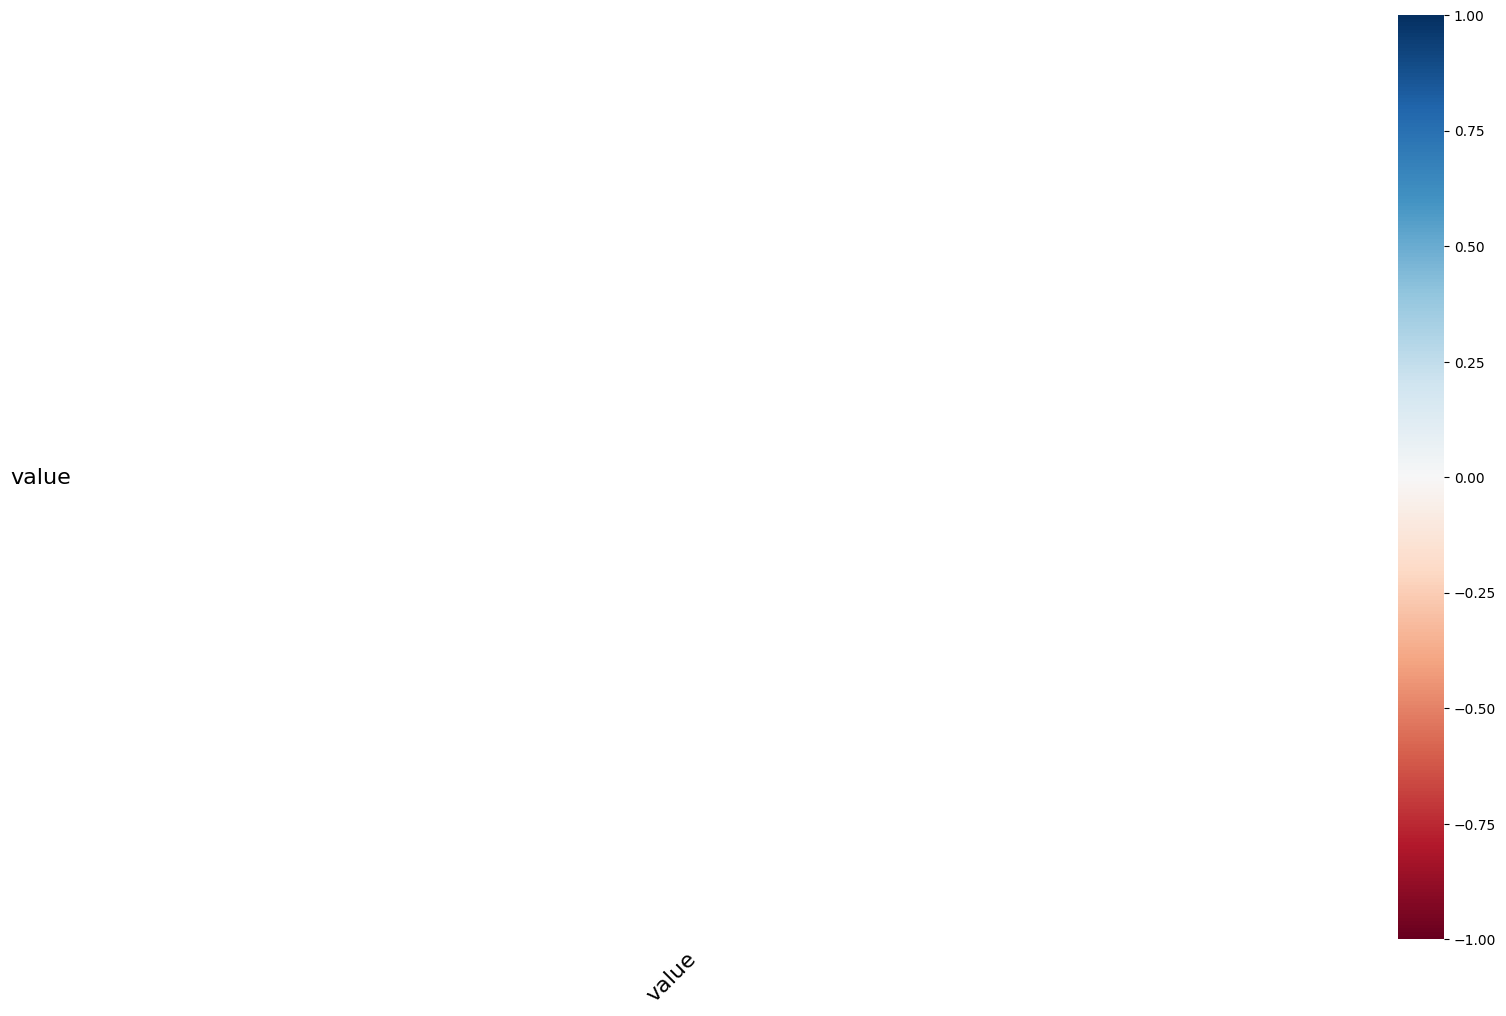

In [19]:
# Visualize missing data (optional)
import missingno as msno

msno.matrix(df_dc)
msno.heatmap(df_dc)

# Drop rows with missing values
df_cleaned = df_dc.dropna()

# Or, fill missing values with the mean
df_filled = df_dc.fillna(df_dc.mean())

Explanation: The msno library provides visualization tools to understand where missing data is in your dataset. The dropna() and fillna() methods allow you to handle missing values by either removing them or filling them with a substitute value.

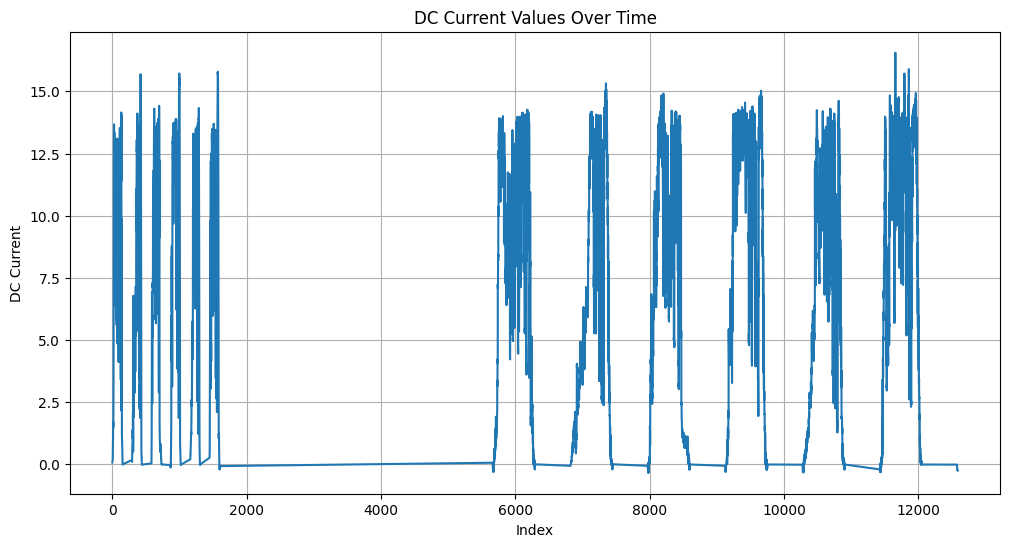

In [23]:
plt.figure(figsize=(12, 6))
df_cleaned['value'].plot()
plt.title('DC Current Values Over Time')
plt.ylabel('DC Current')
plt.xlabel('Index')
plt.grid(True)
plt.show()

Step 4: Handle outliers
Outliers can be managed by either removing them or transforming them:

In [24]:
# Identify outliers using Z-score
from scipy import stats

z_scores = np.abs(stats.zscore(df_cleaned))
df_no_outliers = df_cleaned[(z_scores < 3).all(axis=1)]

# Or cap outliers at a threshold
# upper_limit = df_cleaned['column_name'].quantile(0.95)
# df_cleaned['column_name'] = np.where(df_cleaned['column_name'] > upper_limit, upper_limit, df_cleaned['column_name'])

Explanation: The Z-score method helps identify outliers by calculating how many standard deviations a data point is from the mean. You can remove these outliers or cap them to reduce their impact on your analysis.

Step 5: Scale and normalize data
Normalize or scale your data to ensure that all features contribute equally to the model:

In [25]:
# Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# ou aplicar  Z-score Standardization
# scaler = StandardScaler()
# df_standardized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

Explanation: Scaling ensures that all numerical features in your dataset are on the same scale, which is important for many machine learning algorithms. Min-Max Scaling scales data to a [0, 1] range, while Z-score Standardization scales data to have a mean of 0 and a standard deviation of 1.

Part 3. Automate the workflow
To streamline your data preprocessing workflow, consider wrapping these steps into functions or a reusable script. Here’s a basic structure:

In [ ]:
def load_data(filepath):
    return pd.read_csv(filepath)

def handle_missing_values(df):
    return df.fillna(df.mean())

def remove_outliers(df):
    z_scores = np.abs(stats.zscore(df))
    return df[(z_scores < 3).all(axis=1)]

def scale_data(df):
    scaler = StandardScaler()
    return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

def encode_categorical(df, categorical_columns):
    return pd.get_dummies(df, columns=categorical_columns)

def save_data(df, output_filepath):
    df.to_csv(output_filepath, index=False)

# Example usage:
df = load_data('your_dataset.csv')
df = handle_missing_values(df)
df = remove_outliers(df)
df = scale_data(df)
df = encode_categorical(df, ['categorical_column_name'])
save_data(df, 'cleaned_preprocessed_data.csv')

# 2- Aplicando a limpeza e transformação de dados com um dataset gerado

In [30]:
import pandas as pd
import numpy as np

# Create a dummy dataset
np.random.seed(0)
dummy_data = {
    'Feature1': np.random.normal(100, 10, 100).tolist() + [np.nan, 200],  # Normally distributed with an outlier
    'Feature2': np.random.randint(0, 100, 102).tolist(),  # Random integers
    'Category': ['A', 'B', 'C', 'D'] * 25 + [np.nan, 'A'],  # Categorical with some missing values
    'Target': np.random.choice([0, 1], 102).tolist()  # Binary target variable
}

# Convert the dictionary to a pandas DataFrame
df_dummy = pd.DataFrame(dummy_data)

# Display the first few rows of the dummy dataset
print(df_dummy.head(20))

      Feature1  Feature2 Category  Target
0   117.640523        32        A       1
1   104.001572        70        B       1
2   109.787380        85        C       0
3   122.408932        31        D       1
4   118.675580        13        A       0
5    90.227221        71        B       1
6   109.500884        56        C       1
7    98.486428        24        D       0
8    98.967811        79        A       0
9   104.105985        41        B       1
10  101.440436        18        C       1
11  114.542735        40        D       0
12  107.610377        54        A       1
13  101.216750        79        B       1
14  104.438632        11        C       1
15  103.336743        38        D       1
16  114.940791        93        A       1
17   97.948417         1        B       1
18  103.130677        95        C       0
19   91.459043        44        D       0


Explanation: This code generates a dummy dataset with 100 rows and 4 columns: two numeric features, one categorical feature, and a binary target variable. The dataset includes some missing values and an outlier to simulate real-world data challenges.

## 2. Applying the preprocessing tool 
Next, use the preprocessing tool you set up in the previous lesson to clean and preprocess this dummy data, making it ready for ML.

Step 2: Load the preprocessing tool 
Ensure your preprocessing functions are loaded into your environment. These functions include handling missing values, removing outliers, scaling data, and encoding categorical variables.

In [ ]:
def load_data(df):
    return df

def handle_missing_values(df):
    # Fill numeric columns with mean
    return df.fillna(df.mean())  # For numeric data, fill missing values with the mean



def remove_outliers(df):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
    return df[(z_scores < 3).all(axis=1)]  # Remove rows with any outliers

def scale_data(df):
    scaler = StandardScaler()
    df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))
    return df

def encode_categorical(df, categorical_columns):
    return pd.get_dummies(df, columns=categorical_columns)

def save_data(df, output_filepath):
    df.to_csv(output_filepath, index=False)

Explanation: These functions encapsulate the core preprocessing tasks, making them reusable across different datasets. They will be applied to our dummy data.

## Step 3: Preprocess the dummy data
Apply the preprocessing tool to the dummy data:

In [29]:
# Load the data
df_preprocessed = load_data(df_dummy)

# Handle missing values
df_preprocessed = handle_missing_values(df_preprocessed)

# Remove outliers
df_preprocessed = remove_outliers(df_preprocessed)

# Scale the data
df_preprocessed = scale_data(df_preprocessed)

# Encode categorical variables
df_preprocessed = encode_categorical(df_preprocessed, ['Category'])

# Display the preprocessed data
print(df_preprocessed.head())

TypeError: can only concatenate str (not "int") to str

In [ ]:
# Save the cleaned and preprocessed DataFrame to a CSV file
save_data(df_preprocessed, 'preprocessed_dummy_data.csv')

print('Preprocessing complete. Preprocessed data saved as preprocessed_dummy_data.csv')